In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn import linear_model
%matplotlib inline 

### Loading HH Data

In [90]:
hh_village_coord_fcs = pd.read_csv("../Data/Intermediate_files/hh_village_coord_fcs.csv")

In [91]:
hh_data_2011_cluster_minHH = pd.read_csv("../Data/Intermediate_files/hh_data_2011_cluster_minHH.csv")

### Loading CNN features

In [92]:
google_sat_CNN_features = pd.read_csv("../Data/Intermediate_files/google_sat_CNN_features.csv")

In [93]:
google_sat_CNN_features_lsms = pd.read_csv("../Data/Intermediate_files/google_sat_CNN_features_lsms.csv")

### Merging

In [94]:
data=hh_data_2011_cluster_minHH.merge(google_sat_CNN_features_lsms,on=["i","j"])

In [95]:
start_features=len(hh_data_2011_cluster_minHH.columns)+6

In [96]:
data_features=data.iloc[:,start_features:].transpose()

In [97]:
data.head()

,Unnamed: 0_x,gpsLatitude,gpsLongitude,cons,n,poor,n2,poor_majority,i,j,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,-1.404995,29.949390,2.316352,12,0.250000,12,0,25194,9169,...,0.000000,0.000000,0.218186,0.001699,0.062874,2.291909,0.000000,0.047095,0.005236,0.000000
1,3,-1.340851,29.768257,1.594851,11,0.545455,11,1,25172,9161,...,0.000000,0.067413,0.240615,0.256114,0.309066,0.254673,0.075453,0.115074,0.000000,0.554650
2,4,-1.255216,30.056820,3.852909,10,0.300000,10,0,25207,9151,...,0.119368,0.002062,0.082190,0.035535,0.000000,1.572245,0.000000,0.070199,0.001174,0.178640
3,5,-1.241430,29.961166,2.776385,8,0.500000,8,1,25195,9149,...,0.000000,0.069473,0.000000,0.913471,0.495166,0.474202,0.000000,0.574797,0.236084,0.133874
4,8,-1.166219,29.794294,2.971421,7,0.142857,7,0,25175,9140,...,0.293005,0.000000,0.000000,0.000000,0.000000,1.318193,0.115472,0.065177,0.000000,0.222454


### PCA components vs HH Indicators

In [98]:
pca = PCA(n_components=3)

In [99]:
pca.fit(data_features)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [100]:
eigenvectors=pca.components_

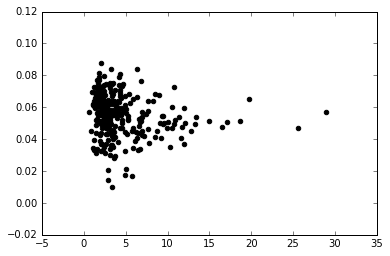

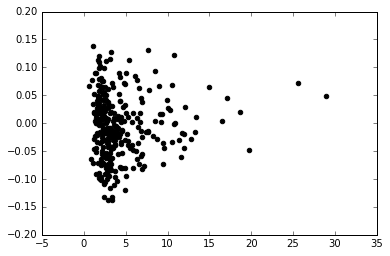

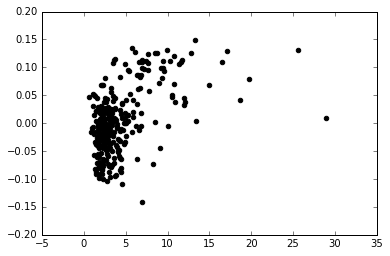

In [101]:
for i in range(3):
    plt.figure()
    plt.scatter(data["cons"], eigenvectors[i],  color='black')

### Fit and evaluate prediction model

In [102]:
X=data.iloc[:,start_features:]
y=data["poor"]

In [103]:
clf = Ridge(alpha=1.0)
clf.fit(X, y) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [104]:
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X, y))

Mean squared error: 0.00
Variance score: 1.00


In [105]:
scores = cross_val_score(clf, X, y, cv=10)
scores   

array([-1.58521016, -2.20441459, -2.87105925, -1.08001576, -0.04512601,
       -0.58710248, -0.91258946, -1.57871425,  0.05459371, -0.72160995])

In [106]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -1.15 (+/- 1.75)


### Poverty dummy

In [110]:
X=data.iloc[:,start_features:]
y=data["poor_majority"]

In [111]:
model = linear_model.LogisticRegression(penalty="l2")
model.fit(X, y) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
model.

In [112]:
scores = cross_val_score(model, X, y, cv=10)
scores   
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.25)


In [113]:
scores   

array([ 0.67741935,  0.64516129,  0.87096774,  0.67741935,  0.93548387,
        0.83870968,  0.58064516,  0.77419355,  0.58064516,  0.56666667])

In [114]:
y.describe()

count    309.000000
mean       0.258900
std        0.438741
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: poor_majority, dtype: float64